In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


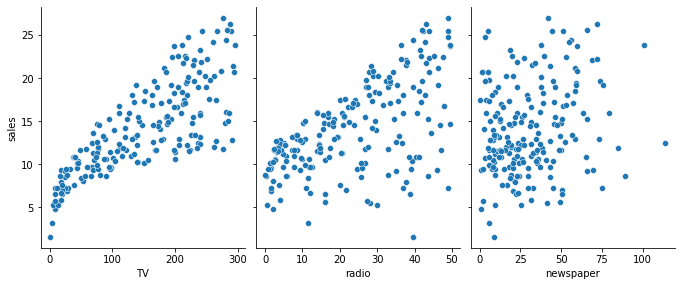

In [80]:
import seaborn as sns
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=4, aspect=0.8)

In [54]:
from sklearn.model_selection import train_test_split
x = data.drop(["Unnamed: 0", 'sales'], axis=1)
print(x.columns)
print(x.shape)
y = data['sales']
print(y.shape)

Index(['TV', 'radio', 'newspaper'], dtype='object')
(200, 3)
(200,)


Since the dimension of the data is not compatible that it can be trained on, we have to use some kind of preprocessing.

In [55]:
y = data['sales'].values.reshape(-1,1)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(f"The various coefficients of the model are :- {reg.coef_}")
print(f"The intercept of the model are :- {reg.intercept_}")
print(f"The equation of the model is :- {reg.coef_[0][0]:.3}*y1 + {reg.coef_[0][1]:.3}*y2 + {reg.coef_[0][2]:.3}*y3 + {reg.intercept_[0]:.3}")


The various coefficients of the model are :- [[ 0.04524001  0.19915856 -0.00235582]]
The intercept of the model are :- [2.76133544]
The equation of the model is :- 0.0452*y1 + 0.199*y2 + -0.00236*y3 + 2.76


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


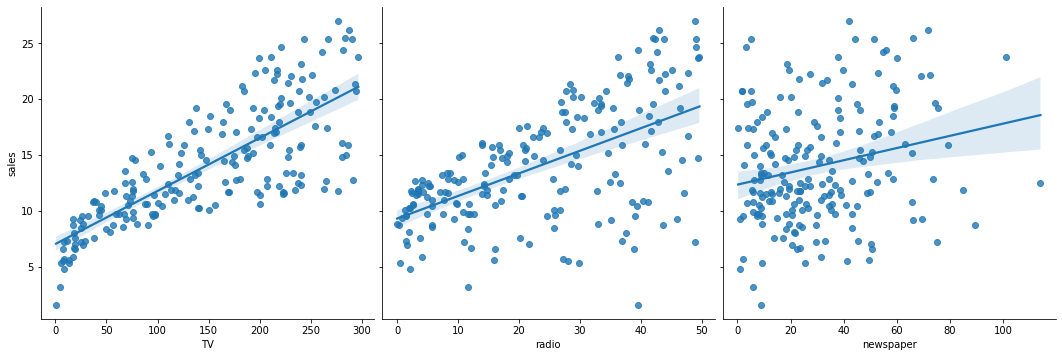

In [75]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, kind='reg')

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = reg.predict(x_test)
print(f"Mean Absolute Error = {mean_absolute_error(y_test, predictions):.3f} ")
print(f"Mean Squared Error = {mean_squared_error(y_test, predictions):.3f}")
print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, predictions)):.3f}")

Mean Absolute Error = 1.193 
Mean Squared Error = 3.095
Root Mean Squared Error = 1.759
